In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import matplotlib.dates as mdates
import scipy.optimize as opt


In [3]:
# load data
filepath = r'C:\Users\maria\Desktop\CubeSats\list_of_detections_new.csv'
df = pd.read_csv(filepath)
df = df[df.T90_370.notna()&df.fluence.notna()]
grbalpha = df[df['CubeSat']=='GRBAlpha'].reset_index(drop=True)
vzlusat = df[df['CubeSat']=='VZLUSAT-2'].reset_index(drop=True)


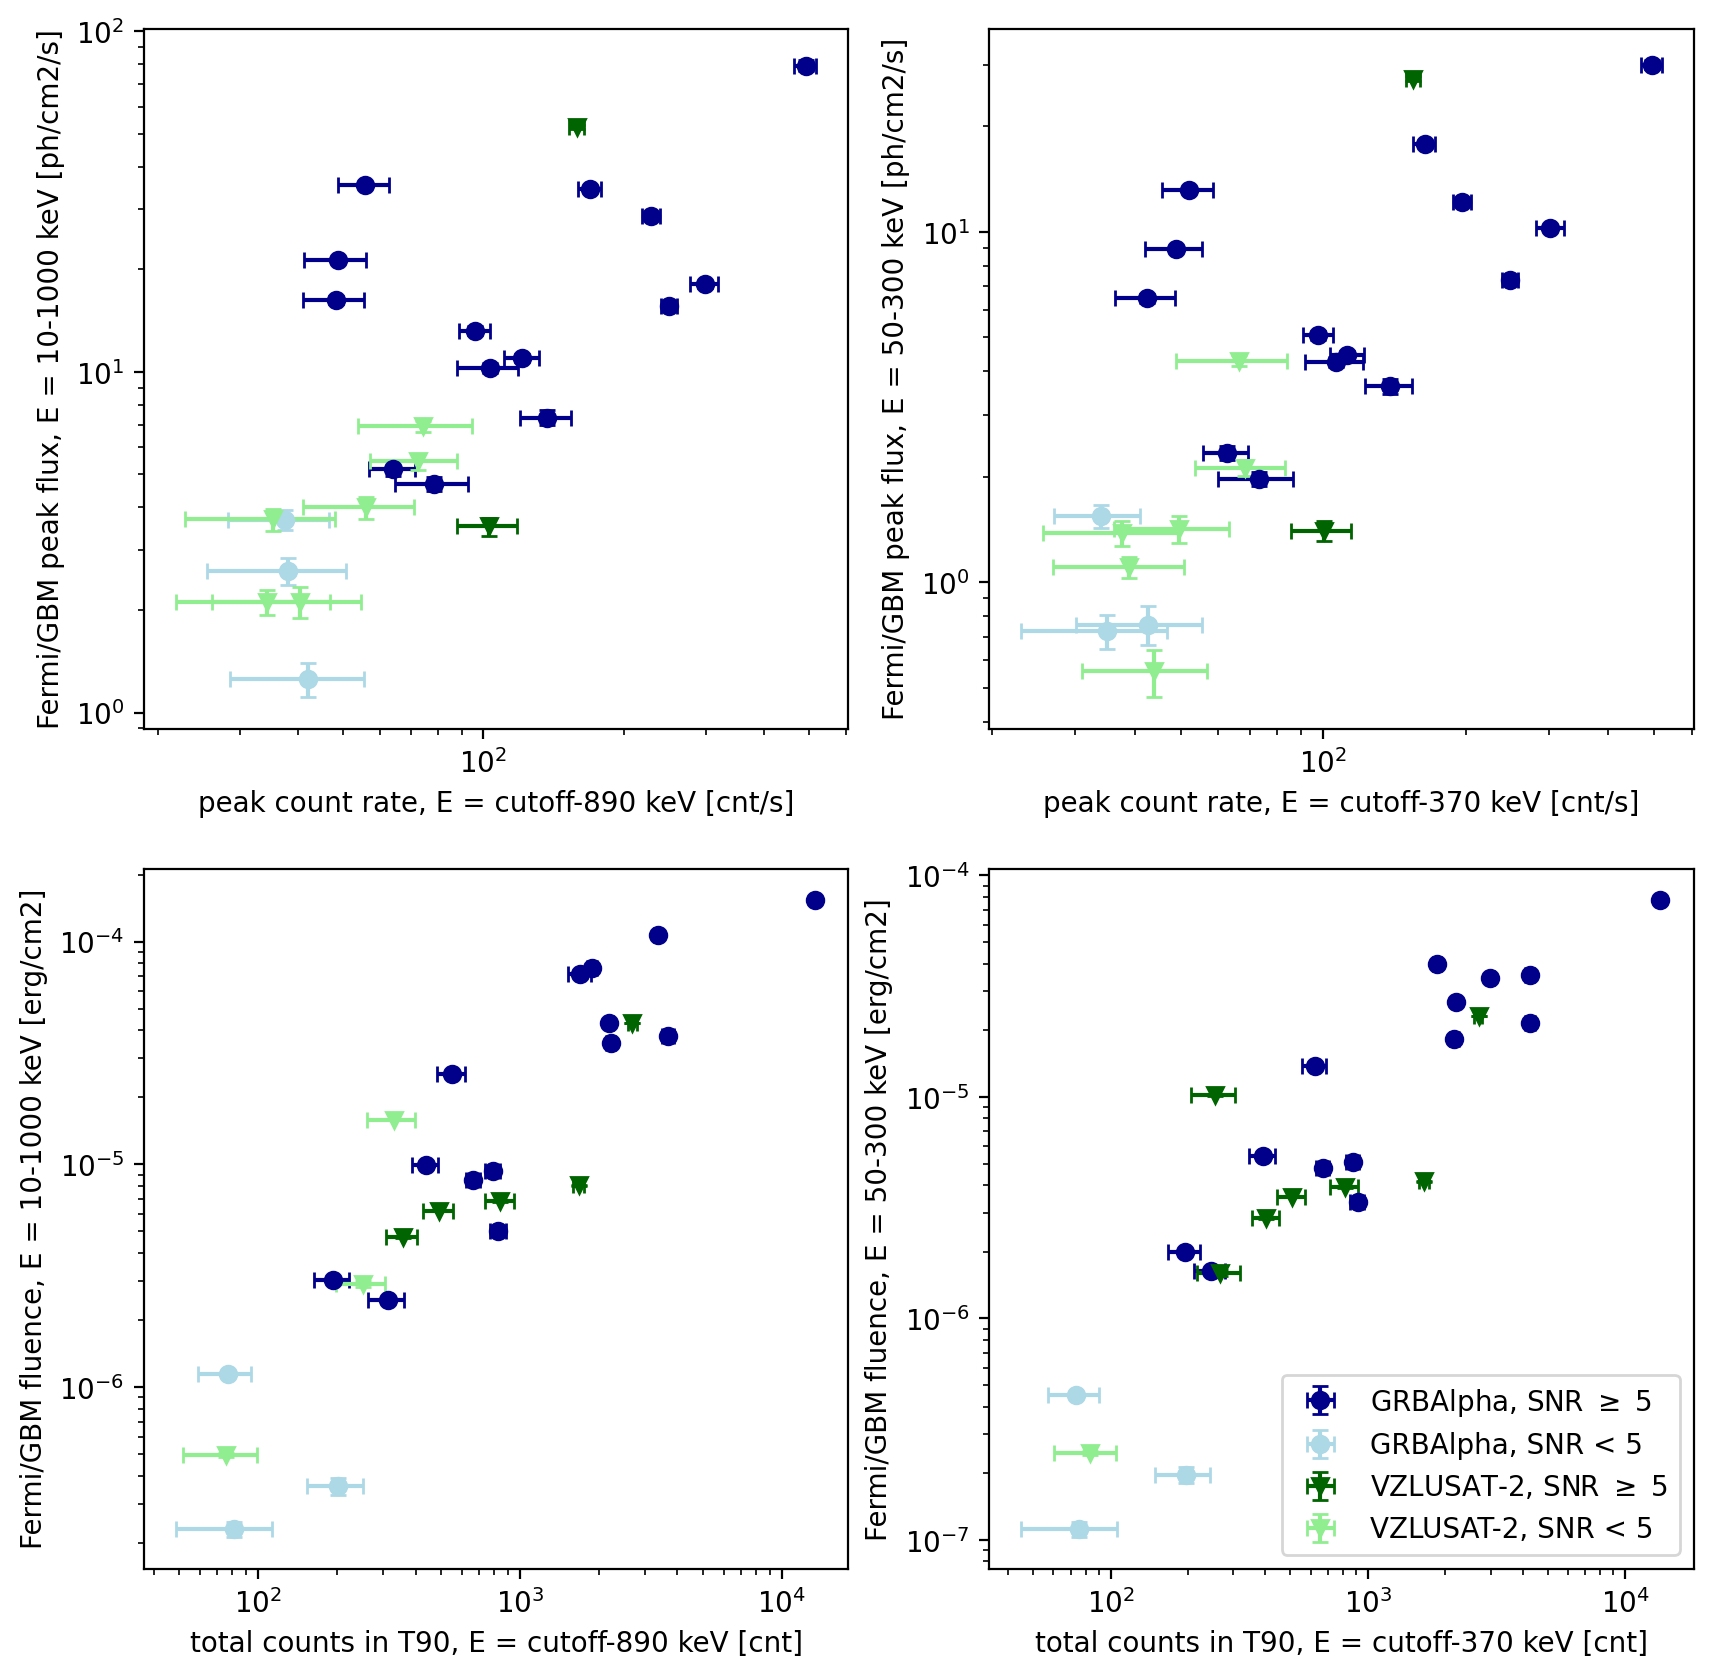

In [7]:
# plot
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10),dpi=200)
# cmap = mpl.colormaps['summer']

snr_limit = 5.0
marker_grbalpha = 'o'
marker_vzlusat = 'v'
size = 3

cond = grbalpha.snr_peak_890 >= snr_limit
axs[0,0].errorbar(grbalpha['cr_peak_cutoff_890'][cond],grbalpha['flux_1024'][cond],
                  xerr=grbalpha['cr_peak_cutoff_890_error'][cond],yerr=grbalpha['flux_1024_error'][cond],
                  c='darkblue',fmt=marker_grbalpha,capsize=size,label=r'GRBAlpha, SNR $\geq$ 5')
cond = grbalpha.snr_peak_890 < snr_limit
axs[0,0].errorbar(grbalpha['cr_peak_cutoff_890'][cond],grbalpha['flux_1024'][cond],
                  xerr=grbalpha['cr_peak_cutoff_890_error'][cond],yerr=grbalpha['flux_1024_error'][cond],
                  c='lightblue',fmt=marker_grbalpha,capsize=size,label='GRBAlpha, SNR < 5')
cond = vzlusat.snr_peak_890 >= snr_limit
axs[0,0].errorbar(vzlusat['cr_peak_cutoff_890'][cond],vzlusat['flux_1024'][cond],
                  xerr=vzlusat['cr_peak_cutoff_890_error'][cond],yerr=vzlusat['flux_1024_error'][cond],
                  c='darkgreen',fmt=marker_vzlusat,capsize=size,label=r'VZLUSAT-2, SNR $\geq$ 5')
cond = vzlusat.snr_peak_890 < snr_limit
axs[0,0].errorbar(vzlusat['cr_peak_cutoff_890'][cond],vzlusat['flux_1024'][cond],
                  xerr=vzlusat['cr_peak_cutoff_890_error'][cond],yerr=vzlusat['flux_1024_error'][cond],
                  c='lightgreen',fmt=marker_vzlusat,capsize=size,label='VZLUSAT-2, SNR < 5')
axs[0,0].set_xlabel('peak count rate, E = cutoff-890 keV [cnt/s]')
axs[0,0].set_ylabel('Fermi/GBM peak flux, E = 10-1000 keV [ph/cm2/s]')
# axs[0,0].legend()#loc='upper left')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')

cond = grbalpha.snr_peak_370 >= snr_limit
axs[0,1].errorbar(grbalpha['cr_peak_cutoff_370'][cond],grbalpha['flux_batse_1024'][cond],
                  xerr=grbalpha['cr_peak_cutoff_370_error'][cond],yerr=grbalpha['flux_batse_1024_error'][cond],
                  c='darkblue',fmt=marker_grbalpha,capsize=size)
cond = grbalpha.snr_peak_370 < snr_limit
axs[0,1].errorbar(grbalpha['cr_peak_cutoff_370'][cond],grbalpha['flux_batse_1024'][cond],
                  xerr=grbalpha['cr_peak_cutoff_370_error'][cond],yerr=grbalpha['flux_batse_1024_error'][cond],
                  c='lightblue',fmt=marker_grbalpha,capsize=size)
cond = vzlusat.snr_peak_370 >= snr_limit
axs[0,1].errorbar(vzlusat['cr_peak_cutoff_370'][cond],vzlusat['flux_batse_1024'][cond],
                  xerr=vzlusat['cr_peak_cutoff_370_error'][cond],yerr=vzlusat['flux_batse_1024_error'][cond],
                  c='darkgreen',fmt=marker_vzlusat,capsize=size)
cond = vzlusat.snr_peak_370 < snr_limit
axs[0,1].errorbar(vzlusat['cr_peak_cutoff_370'][cond],vzlusat['flux_batse_1024'][cond],
                  xerr=vzlusat['cr_peak_cutoff_370_error'][cond],yerr=vzlusat['flux_batse_1024_error'][cond],
                  c='lightgreen',fmt=marker_vzlusat,capsize=size)
axs[0,1].set_xlabel('peak count rate, E = cutoff-370 keV [cnt/s]')
axs[0,1].set_ylabel('Fermi/GBM peak flux, E = 50-300 keV [ph/cm2/s]')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')

cond = grbalpha.snr_t90_890 >= snr_limit
axs[1,0].errorbar(grbalpha['cnt_t90_cutoff_890'][cond],grbalpha['fluence'][cond],
                  xerr=grbalpha['cnt_t90_cutoff_890_error'][cond],yerr=grbalpha['fluence_error'][cond],
                  c='darkblue',fmt=marker_grbalpha,capsize=size)
cond = grbalpha.snr_t90_890 < snr_limit
axs[1,0].errorbar(grbalpha['cnt_t90_cutoff_890'][cond],grbalpha['fluence'][cond],
                  xerr=grbalpha['cnt_t90_cutoff_890_error'][cond],yerr=grbalpha['fluence_error'][cond],
                  c='lightblue',fmt=marker_grbalpha,capsize=size)
cond = vzlusat.snr_t90_890 >= snr_limit
axs[1,0].errorbar(vzlusat['cnt_t90_cutoff_890'][cond],vzlusat['fluence'][cond],
                  xerr=vzlusat['cnt_t90_cutoff_890_error'][cond],yerr=vzlusat['fluence_error'][cond],
                  c='darkgreen',fmt=marker_vzlusat,capsize=size)
cond = vzlusat.snr_t90_890 < snr_limit
axs[1,0].errorbar(vzlusat['cnt_t90_cutoff_890'][cond],vzlusat['fluence'][cond],
                  xerr=vzlusat['cnt_t90_cutoff_890_error'][cond],yerr=vzlusat['fluence_error'][cond],
                  c='lightgreen',fmt=marker_vzlusat,capsize=size)
axs[1,0].set_xlabel('total counts in T90, E = cutoff-890 keV [cnt]')
axs[1,0].set_ylabel('Fermi/GBM fluence, E = 10-1000 keV [erg/cm2]')
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')

cond = grbalpha.snr_t90_370 >= snr_limit
axs[1,1].errorbar(grbalpha['cnt_t90_cutoff_370'][cond],grbalpha['fluence_batse'][cond],
                  xerr=grbalpha['cnt_t90_cutoff_370_error'][cond],yerr=grbalpha['fluence_batse_error'][cond],
                  c='darkblue',fmt=marker_grbalpha,capsize=size,label=r'GRBAlpha, SNR $\geq$ 5')
cond = grbalpha.snr_t90_370 < snr_limit
axs[1,1].errorbar(grbalpha['cnt_t90_cutoff_370'][cond],grbalpha['fluence_batse'][cond],
                  xerr=grbalpha['cnt_t90_cutoff_370_error'][cond],yerr=grbalpha['fluence_batse_error'][cond],
                  c='lightblue',fmt=marker_grbalpha,capsize=size,label='GRBAlpha, SNR < 5')
cond = vzlusat.snr_t90_370 >= snr_limit
axs[1,1].errorbar(vzlusat['cnt_t90_cutoff_370'][cond],vzlusat['fluence_batse'][cond],
                  xerr=vzlusat['cnt_t90_cutoff_370_error'][cond],yerr=vzlusat['fluence_batse_error'][cond],
                  c='darkgreen',fmt=marker_vzlusat,capsize=size,label=r'VZLUSAT-2, SNR $\geq$ 5')
cond = vzlusat.snr_t90_370 < snr_limit
axs[1,1].errorbar(vzlusat['cnt_t90_cutoff_370'][cond],vzlusat['fluence_batse'][cond],
                  xerr=vzlusat['cnt_t90_cutoff_370_error'][cond],yerr=vzlusat['fluence_batse_error'][cond],
                  c='lightgreen',fmt=marker_vzlusat,capsize=size,label='VZLUSAT-2, SNR < 5')
axs[1,1].set_xlabel('total counts in T90, E = cutoff-370 keV [cnt]')
axs[1,1].set_ylabel('Fermi/GBM fluence, E = 50-300 keV [erg/cm2]')
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
axs[1,1].legend()


In [5]:
print(grbalpha.sort_values(by='flux_1024')[['event','flux_1024','snr_peak_890']])
print(grbalpha.sort_values(by='flux_batse_1024')[['event','flux_batse_1024','snr_peak_370']])
print(grbalpha.sort_values(by='fluence')[['event','fluence','snr_t90_890']])
print(grbalpha.sort_values(by='fluence_batse')[['event','fluence_batse','snr_t90_370']])


          event  flux_1024  snr_peak_890
11  GRB 221112A     1.2552         3.141
13  GRB 221127A     2.6076         3.014
3   GRB 220826B     3.6785         4.098
15  GRB 230102A     4.6907         5.591
7   GRB 221020A     5.2027         8.794
16  GRB 230204B     7.3460         7.895
10  GRB 221107A    10.3033         6.680
4   GRB 220829A    10.9956        11.503
6   GRB 220927A    13.2230        13.207
1   GRB 211018A    15.6320        25.391
5   GRB 220915A    16.2828         6.701
12  GRB 221119A    18.0761        14.453
0   GRB 210909A    21.3674         6.566
2   GRB 211019A    28.6531        22.530
8   GRB 221022B    34.3478        17.061
9   GRB 221029A    35.4742         7.983
14  GRB 221206B    79.3461        18.530
          event  flux_batse_1024  snr_peak_370
13  GRB 221127A           0.7281         2.942
11  GRB 221112A           0.7584         3.380
3   GRB 220826B           1.5451         4.848
15  GRB 230102A           1.9723         5.556
7   GRB 221020A           2

In [ ]:
# # print results:
# output = (f"Fermi/GBM peak flux, E = 10-1000 keV [ph/cm2/s]\n"+
#           f"... sth ...\n")

# filepath = "C:\\Users\\maria\\Desktop\\CubeSats\\sensitivity_grbs.txt"
# with open(filepath, "w") as text_file:
#     text_file.write(output)
